# High-dimensional data to low-dimensional data

k-dimensional principal component

$X = X_{m * n}$ represents the raw data

$w = w_{k*n}$ represents the k-dimensional unit matrix 


The k-dimensional principal component data is $X_k = X·w^T$

Restored $X_m = X_k·w $

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty(( 100, 2))
X[:, 0] = np.random.uniform(0., 100., size = 100)
X[:, 1] = 0.75 * X[:, 0] + 3. + np.random.normal(0, 10, size = 100)

In [3]:
from playML.PCA import PCA

pca = PCA(n_components = 2)
pca.fit(X)

PCA(n_components = 2)

In [4]:
pca.components_

array([[ 0.7764235 ,  0.63021151],
       [ 0.63021639, -0.77641954]])

In [5]:
pca = PCA(n_components = 1)
pca.fit(X)

PCA(n_components = 1)

In [6]:
X_reduction = pca.transform(X)

In [7]:
X_reduction.shape

(100, 1)

In [8]:
X_restore = pca.inverse_transform(X_reduction)

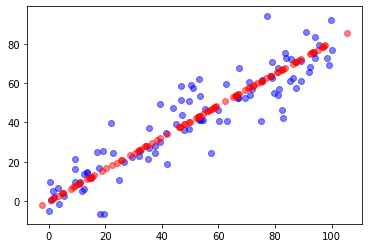

In [9]:
plt.scatter(X[:,0], X[:, 1], color = 'b', alpha = 0.5)
plt.scatter(X_restore[:,0], X_restore[:, 1], color = 'r', alpha = 0.5)
plt.show()

## PCA in Scikit-learn 

In [10]:
from sklearn.decomposition import PCA

In [11]:
pca = PCA(n_components = 1)
pca.fit(X)

PCA(n_components=1)

In [12]:
pca.components_

array([[-0.77642359, -0.6302114 ]])

In [13]:
X_reduction = pca.transform(X)

In [14]:
X_reduction.shape

(100, 1)

In [15]:
X_restore = pca.inverse_transform(X_reduction)

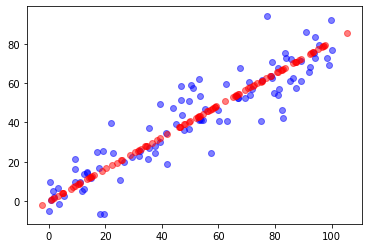

In [16]:
plt.scatter(X[:,0], X[:, 1], color = 'b', alpha = 0.5)
plt.scatter(X_restore[:,0], X_restore[:, 1], color = 'r', alpha = 0.5)
plt.show()

In [17]:
from sklearn import datasets

In [18]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 666)

In [20]:
X_train.shape

(1347, 64)

In [21]:
%%time
from sklearn.neighbors import KNeighborsClassifier
kNN_classifier = KNeighborsClassifier(n_neighbors = 6)
kNN_classifier.fit(X_train, y_train)

CPU times: user 11.6 ms, sys: 4.63 ms, total: 16.2 ms
Wall time: 15.4 ms


KNeighborsClassifier(n_neighbors=6)

In [22]:
kNN_classifier.score(X_test, y_test)

0.9844444444444445

In [23]:
pca = PCA(n_components = 2)
pca.fit(X_train)
X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)

In [24]:
%%time
from sklearn.neighbors import KNeighborsClassifier
kNN_classifier = KNeighborsClassifier(n_neighbors = 6)
kNN_classifier.fit(X_train_reduction, y_train)

CPU times: user 5.02 ms, sys: 1.46 ms, total: 6.48 ms
Wall time: 2.28 ms


KNeighborsClassifier(n_neighbors=6)

In [25]:
kNN_classifier.score(X_test_reduction, y_test)

0.6111111111111112

In [26]:
pca.explained_variance_ratio_

array([0.14566817, 0.13735469])

In [27]:
pca = PCA(n_components = X_train.shape[1])
pca.fit(X_train)
pca.explained_variance_ratio_

array([1.45668166e-01, 1.37354688e-01, 1.17777287e-01, 8.49968861e-02,
       5.86018996e-02, 5.11542945e-02, 4.26605279e-02, 3.60119663e-02,
       3.41105814e-02, 3.05407804e-02, 2.42337671e-02, 2.28700570e-02,
       1.80304649e-02, 1.79346003e-02, 1.45798298e-02, 1.42044841e-02,
       1.29961033e-02, 1.26617002e-02, 1.01728635e-02, 9.09314698e-03,
       8.85220461e-03, 7.73828332e-03, 7.60516219e-03, 7.11864860e-03,
       6.85977267e-03, 5.76411920e-03, 5.71688020e-03, 5.08255707e-03,
       4.89020776e-03, 4.34888085e-03, 3.72917505e-03, 3.57755036e-03,
       3.26989470e-03, 3.14917937e-03, 3.09269839e-03, 2.87619649e-03,
       2.50362666e-03, 2.25417403e-03, 2.20030857e-03, 1.98028746e-03,
       1.88195578e-03, 1.52769283e-03, 1.42823692e-03, 1.38003340e-03,
       1.17572392e-03, 1.07377463e-03, 9.55152460e-04, 9.00017642e-04,
       5.79162563e-04, 3.82793717e-04, 2.38328586e-04, 8.40132221e-05,
       5.60545588e-05, 5.48538930e-05, 1.08077650e-05, 4.01354717e-06,
      

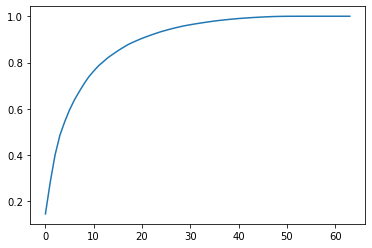

In [28]:
plt.plot([i for i in range(X_train.shape[1])], 
        [np.sum(pca.explained_variance_ratio_[:i + 1])\
        for i in range(X_train.shape[1])])
plt.show()

In [29]:
pca = PCA(0.95)
pca.fit(X_train)

PCA(n_components=0.95)

In [30]:
pca.n_components_

28

In [31]:
X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)

In [32]:
%%time
from sklearn.neighbors import KNeighborsClassifier
kNN_classifier = KNeighborsClassifier(n_neighbors = 6)
kNN_classifier.fit(X_train_reduction, y_train)

CPU times: user 9.99 ms, sys: 1.96 ms, total: 12 ms
Wall time: 3.65 ms


KNeighborsClassifier(n_neighbors=6)

In [33]:
kNN_classifier.score(X_test_reduction, y_test)

0.9844444444444445

In [34]:
pca = PCA(n_components = 2)
pca.fit(X)
X_reduction = pca.transform(X)

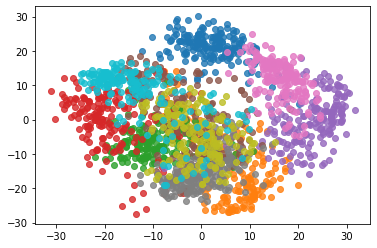

In [35]:
for i in range(10):
    plt.scatter(X_reduction[y == i , 0], X_reduction[y == i, 1],
               alpha = 0.8)
    # X_reduction[y == i , 0] represents the 0 location of X when y == i
plt.show()